In [3]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv(r"C:\Users\DELL\Downloads\archive (3)\diabetes.csv", header=None, names=col_names)

In [4]:
pima.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [5]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable


In [6]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [8]:
# Convert categorical columns to numeric if any
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Ensure X_train is numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Fill missing values if any
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Convert DataFrame to numpy array before training
X_train = X_train.values
X_test = X_test.values

# Fit logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[114,  17],
       [ 21,  41]])

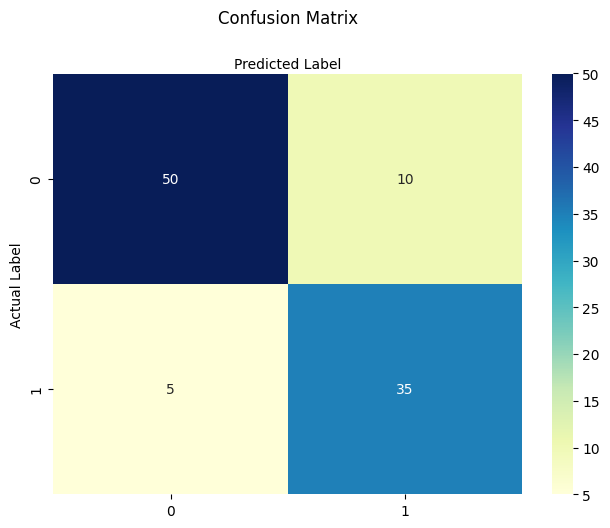

In [15]:
# Import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Ensure pandas is imported

# Example confusion matrix (replace with your actual matrix)
cnf_matrix = np.array([[50, 10], [5, 35]])  # Replace this with your actual confusion matrix

# Define class names
class_names = [0, 1]

# Create figure and axis
fig, ax = plt.subplots()

# Set tick marks and labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# Adjust axis labels and title
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Show plot
plt.show()


In [12]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.84      0.87      0.86       131
   with diabetes       0.71      0.66      0.68        62

        accuracy                           0.80       193
       macro avg       0.78      0.77      0.77       193
    weighted avg       0.80      0.80      0.80       193



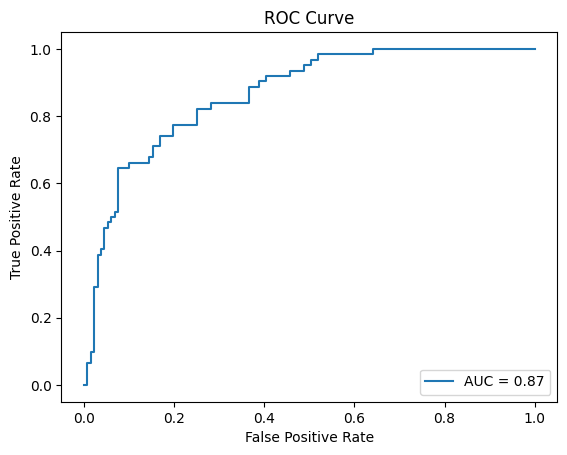

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

# Ensure y_test is numeric
y_test = pd.to_numeric(y_test, errors='coerce')

# Predict probabilities
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc=4)
plt.show()
